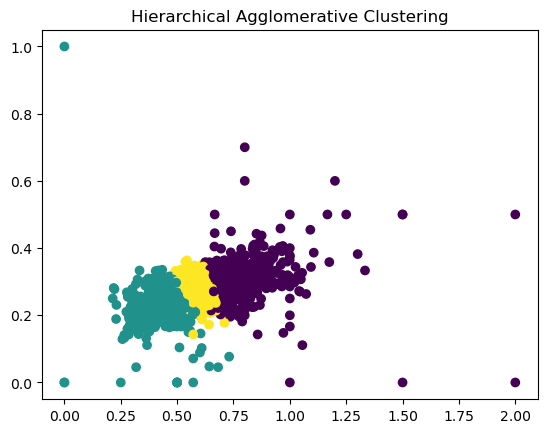

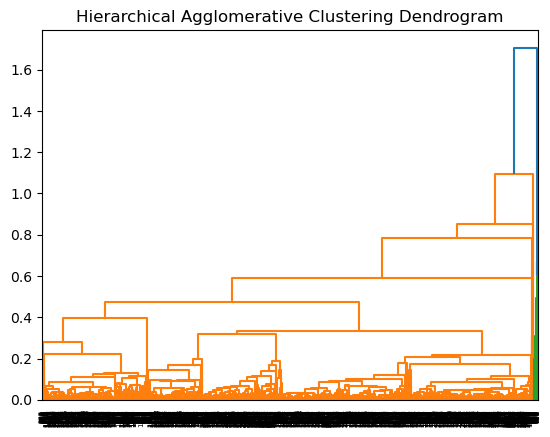

In [18]:
# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

dataset_R6 = pd.read_csv("./DatasetR6/S5_operators.csv", sep=';')

# plus de lose rate
dataset_R6.insert(dataset_R6.shape[1],"w/r", (dataset_R6["nbwins"]/dataset_R6["nbpicks"]), True) 
dataset_R6.insert(dataset_R6.shape[1],"k/r", (dataset_R6["nbkills"]/dataset_R6["nbpicks"]), True) 
dataset_R6.insert(dataset_R6.shape[1],"d/r", (1-(dataset_R6["nbdeaths"]/dataset_R6["nbpicks"])), True) 
dataset_R6.drop(columns=["nbwins","nbpicks","role"], inplace=True)


# on merge et enleve les colonnes plateformes et dateid sans perdre les données associées
dataset_R6 = dataset_R6.groupby(['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget'], as_index=False)[['w/r','k/r','d/r']].mean()
dataset_R6.drop(columns=['skillrank','operator', 'primaryweapon', 'secondaryweapon', 'secondarygadget'], inplace=True)

dataset = dataset_R6.copy()



# Générer des données synthétiques
#X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Effectuer le clustering hiérarchique agglomératif
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Le paramètre 'ward' utilise la méthode de liaison de Ward
labels = model.fit_predict(dataset)


# Afficher les résultats
plt.scatter(dataset['k/r'], dataset['d/r'], c=labels, cmap='viridis')
plt.title('Hierarchical Agglomerative Clustering')
plt.show()

# Afficher le dendrogramme
#linked = linkage(dataset, 'ward') 1
#linked = linkage(dataset, 'single')
#linked = linkage(dataset, 'average')
#linked = linkage(dataset, 'complete') 1
#linked = linkage(dataset, 'weighted') 1
#linked = linkage(dataset, 'centroid') 
#linked = linkage(dataset, 'median')


linked = linkage(dataset, 'median')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.show()

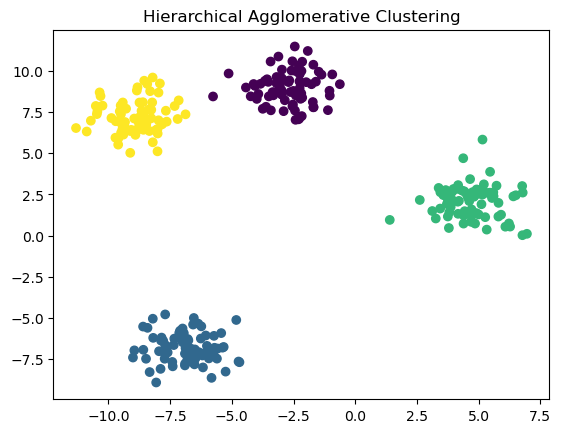

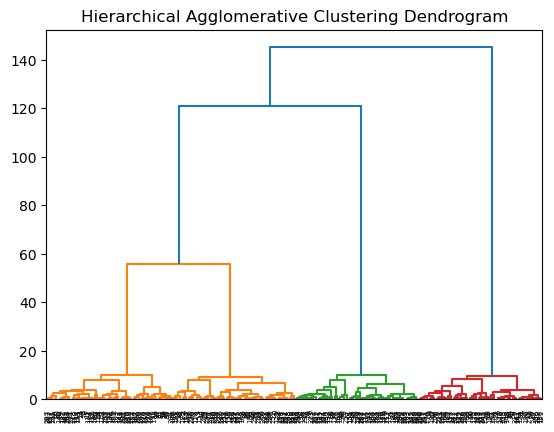

In [7]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Générer des données synthétiques
X, y = make_blobs(n_samples=300, centers=4, random_state=42)


# Effectuer le clustering hiérarchique agglomératif
model = AgglomerativeClustering(n_clusters=4, linkage='ward')  # Le paramètre 'ward' utilise la méthode de liaison de Ward
labels = model.fit_predict(X)

# Afficher les résultats
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Hierarchical Agglomerative Clustering')
plt.show()

# Afficher le dendrogramme
linked = linkage(X, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.show()